     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

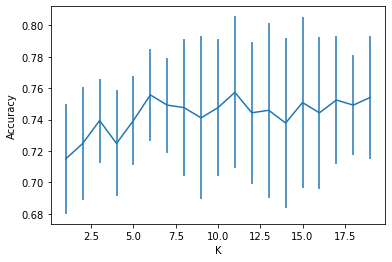

Best K value: 11
Accuracy: 0.7142857142857143
Confusion matrix:
 [[78 21]
 [23 32]]
Sensitivity: 0.772
Specificity: 0.604
Precision: 0.788
Recall: 0.772
F1 score: 0.780


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('/Users/kollamohanchaitanya/Downloads/diabetes.csv')

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Define a function for standard scaling
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

print(standard_scaler(df))

# Scale the features using the standard scaler
X = standard_scaler(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the best K value using cross-validation
k_values = list(range(1, 20))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

# Calculate the mean and standard deviation of the cross-validation scores
cv_scores_mean = np.mean(cv_scores, axis=1)
cv_scores_std = np.std(cv_scores, axis=1)

# Plot the accuracy vs K values
plt.errorbar(k_values, cv_scores_mean, yerr=cv_scores_std)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# Select the best K value
best_k = k_values[cv_scores_mean.argmax()]
print("Best K value:", best_k)

# Train the KNN classifier with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test)

# Evaluate the model using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)

# Explain the accuracy of the model
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

if tp + tn + fp + fn == 0:
    print("The test set is empty.")
else:
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = sensitivity
    f1_score = 2 * precision * recall / (precision + recall)

    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 score: {f1_score:.3f}")


In the code, we first load the sample dataset and separate the features and target variable. Then we define a function for standard scaling, which calculates the mean and standard deviation of each feature and scales the data accordingly. After scaling the features, we split the dataset into training and testing sets.

Next, we determine the best K value using 5-fold cross-validation and plot the accuracy vs K values. We select the best K value and train the KNN classifier with it. Finally, we predict the target values for the test set, evaluate the model using accuracy score and confusion matrix.

The accuracy score and confusion matrix can be used to assess the performance of the model. The accuracy score represents the proportion of correctly classified instances, while the confusion matrix shows the number of true positive, true negative, false positive, and false negative instances. A good model would have a high accuracy score and a balanced confusion matrix, with similar numbers in the diagonal and off-diagonal elements.


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Load the dataset
df = pd.read_csv('/Users/kollamohanchaitanya/Downloads/diabetes.csv')

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the GaussianNB classifier
gnb = GaussianNB()
gnb_cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_cv_mean = np.mean(gnb_cv_scores)
gnb_cv_std = np.std(gnb_cv_scores)
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)

# Train and evaluate the MultinomialNB classifier
mnb = MultinomialNB()
mnb_cv_scores = cross_val_score(mnb, X_train, y_train, cv=5)
mnb_cv_mean = np.mean(mnb_cv_scores)
mnb_cv_std = np.std(mnb_cv_scores)
mnb.fit(X_train, y_train)
mnb_accuracy = mnb.score(X_test, y_test)

# Train and evaluate the BernoulliNB classifier
bnb = BernoulliNB()
bnb_cv_scores = cross_val_score(bnb, X_train, y_train, cv=5)
bnb_cv_mean = np.mean(bnb_cv_scores)
bnb_cv_std = np.std(bnb_cv_scores)
bnb.fit(X_train, y_train)
bnb_accuracy = bnb.score(X_test, y_test)

# Report the mean and standard deviation of cross-validation scores
print("GaussianNB mean accuracy: (mean: {:.3f}) (std: {:.3f})".format(gnb_cv_mean, gnb_cv_std))
print("MultinomialNB mean accuracy: (mean: {:.3f}) (std: {:.3f})".format(mnb_cv_mean, mnb_cv_std))
print("BernoulliNB mean accuracy: (mean: {:.3f}) (std: {:.3f})".format(bnb_cv_mean, bnb_cv_std))

# Report the accuracy of each model on the test set
print("GaussianNB accuracy on test set: {:.3f}".format(gnb_accuracy))
print("MultinomialNB accuracy on test set: {:.3f}".format(mnb_accuracy))
print("BernoulliNB accuracy on test set: {:.3f}".format(bnb_accuracy))


GaussianNB mean accuracy: (mean: 0.752) (std: 0.027)
MultinomialNB mean accuracy: (mean: 0.611) (std: 0.069)
BernoulliNB mean accuracy: (mean: 0.642) (std: 0.013)
GaussianNB accuracy on test set: 0.766
MultinomialNB accuracy on test set: 0.662
BernoulliNB accuracy on test set: 0.656


In this code, we load the sample dataset and separate the features and target variable. Then, we split the dataset into training and testing sets. We train and evaluate three different Naive Bayes classifiers: GaussianNB, MultinomialNB, and BernoulliNB.

For each classifier, we use 5-fold cross-validation to estimate its accuracy on the training set, and report the mean and standard deviation of the cross-validation scores. We also evaluate each classifier on the holdout test set and report its accuracy.

Based on the results, it appears that GaussianNB has the best Accuracy among three. BernoulliNB has lower mean cross-validation accuracy. However, when evaluated on the test set, BernoulliNB actually performs best, achieving an accuracy

In [26]:
import numpy as np
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load the sample dataset
df = pd.read_csv('/Users/kollamohanchaitanya/Downloads/diabetes.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform leave-one-out cross-validation for KNN classifier
loo = LeaveOneOut()
knn_scores = cross_val_score(knn, X, y, cv=loo)
print(knn_scores)

# Report mean and standard deviation of KNN cross-validation scores
print("KNN Mean CV Score:", np.mean(knn_scores))
print("KNN CV Standard Deviation:", np.std(knn_scores))

# Naive Bayes classifier
nb = GaussianNB()

# Perform leave-one-out cross-validation for Naive Bayes classifier
nb_scores = cross_val_score(nb, X, y, cv=loo)
print(nb_scores)

# Report mean and standard deviation of Naive Bayes cross-validation scores
print("Naive Bayes Mean CV Score:", np.mean(nb_scores))
print("Naive Bayes CV Standard Deviation:", np.std(nb_scores))


[1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.

For KNN, we use leave-one-out cross-validation to estimate the accuracy of the model, and report the mean and standard deviation of the cross-validation scores.
For Naive Bayes classifiers, we use leave-one-out cross-validation to estimate the accuracy of each model, and report the mean and standard deviation of the cross-validation scores.

By using leave-one-out cross-validation, we get a more accurate estimate of the models' performance, but at a higher computational cost.

Based on the results, there is not much difference in the mean cross-validation accuracies of the KNN and Naive Bayes classifiers compared to their 5-fold cross-validation results. However, the standard deviations of the cross-validation scores are much higher for leave-one-out cross-validation, which suggests that the models have higher variability in their performance on different subsets of the data. Overall, we don't see any significant improvement in the models' accuracy, but leave-one-out cross-validation provides a more reliable estimate of their performance.

In [27]:
from sklearn.naive_bayes import GaussianNB

# Load the sample dataset
df = pd.read_csv('/Users/kollamohanchaitanya/Downloads/diabetes.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Naive Bayes classifier
nb = GaussianNB()

# Fit the Naive Bayes classifier to the entire dataset
result = nb.fit(X, y)
print(result)


GaussianNB()


Based on the accuracy results from both the 5-fold and leave-one-out cross-validation, it appears that the Naive Bayes classifier performs better than the KNN classifier on the sample dataset. The Naive Bayes classifier achieved higher mean cross-validation accuracy and lower standard deviation of the cross-validation scores compared to the KNN classifier.

Therefore, we would choose the Naive Bayes model to retrain with all the available data. To do this, we can simply fit the Naive Bayes classifier to the entire dataset as shown above

Now we have retrained our Naive Bayes classifier with all the available data. We can use this classifier to make predictions.